In [ ]:
#-------------------------------------------------------------------------------
# Los datos de Datawarehouse(DWH) se bajaron del Google Cloud Platform a DRIVE
# se preparo la data para ser leida por el modelo y solo contiene los 
# registros VUL(Vulnerabilidad), que es el dato calculado entre la
# migracion neta / PBI
# Se monta el DRIVE para leer la data
#-------------------------------------------------------------------------------
# OBJETIVO: Aplicar un modelo de machine learning para poder predecir la
# vulnerabilidad del pais, los parametrosde de seleccion son: pais y año, 
# que para los fines el aniopreceir es 2021.
# El modelo que se usa es de regresion ineal
######
# EVALUACION DEL MODELO:
#     Se aplican -  R2
#                   MSE
#                   MAE
#-------------------------------------------------------------------------------

In [ ]:
# para tener acceso a la tabla generada desde el DWH
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicción para PER en 2021: -2.6788
R2: 0.6012
MSE: 237.4824
MAE: 12.1541


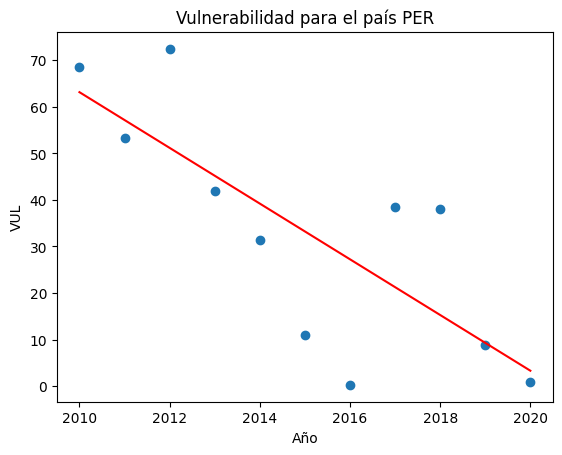

In [ ]:
#-------------------------------------------------------------------------------
# modelo de ML para la prediccion de vulnerabilidad y evaluacion del modelo
#-------------------------------------------------------------------------------
#
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# hacemos la ingesta de la data de vulnerabilidad por paises
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLparaPFbootcampDS/dwhMLVULprepDATA.csv')

# Seleccionar país para la predicción
paispredecir = 'PER'

# Convertir de ancho a largo
df_melted = pd.melt(df, id_vars=['codigopais'], var_name='year', value_name='remittances')

# eliminamos valores NaN
df_melted.dropna(inplace=True)

# Convertir year a variable numérica
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Convertir remittances a tipo float
#df_melted['remittances'] = df_melted['remittances'].str.replace(',', '.').astype(float)

# Convertir codigopais a variable numérica mediante LabelEncoder
le = LabelEncoder()
df_melted['codigopais'] = le.fit_transform(df_melted['codigopais'])

# Filtrar datos por país seleccionado
df_pais = df_melted[df_melted['codigopais'] == le.transform([paispredecir])[0]]

# Ajustar modelo de regresión
X = df_pais[df_pais['year'] <= 2020][['year', 'codigopais']]
y = df_pais[df_pais['year'] <= 2020]['remittances']
reg = LinearRegression().fit(X, y)

# Hacer predicciones para el país seleccionado
añopredecir = 2021
X_pred = np.array([[añopredecir, le.transform([paispredecir])[0]]])
y_pred = reg.predict(X_pred)
print(f"Predicción para {paispredecir} en {añopredecir}: {y_pred[0]:.4f}")

# calcular R2, MSE y MAE para el modelo
y_true = df_pais[df_pais['year'] <= 2020]['remittances']
y_pred_train = reg.predict(X)
r2 = r2_score(y_true, y_pred_train)
mse = mean_squared_error(y_true, y_pred_train)
mae = mean_absolute_error(y_true, y_pred_train)

print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Visualizar datos
plt.scatter(X['year'], y)
plt.plot(X['year'], y_pred_train, color='red')
plt.xlabel('Año')
plt.ylabel('VUL')
plt.title('Vulnerabilidad para el país ' + paispredecir)
plt.show()